<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


 ## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage. 

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans. 


  ## Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering 


----


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab 



In [13]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis 


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [14]:
import pandas as pd

# Define the file path
file_path = r'D:\06_CONTINUOUS LEARNING\01-DATA SCIENTIST\IBM Data Science-Coursera\10_Data Science Capstone Project\week02\dataset_part_2.csv'

# Load the dataset into a DataFrame named df
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,Unnamed: 0,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


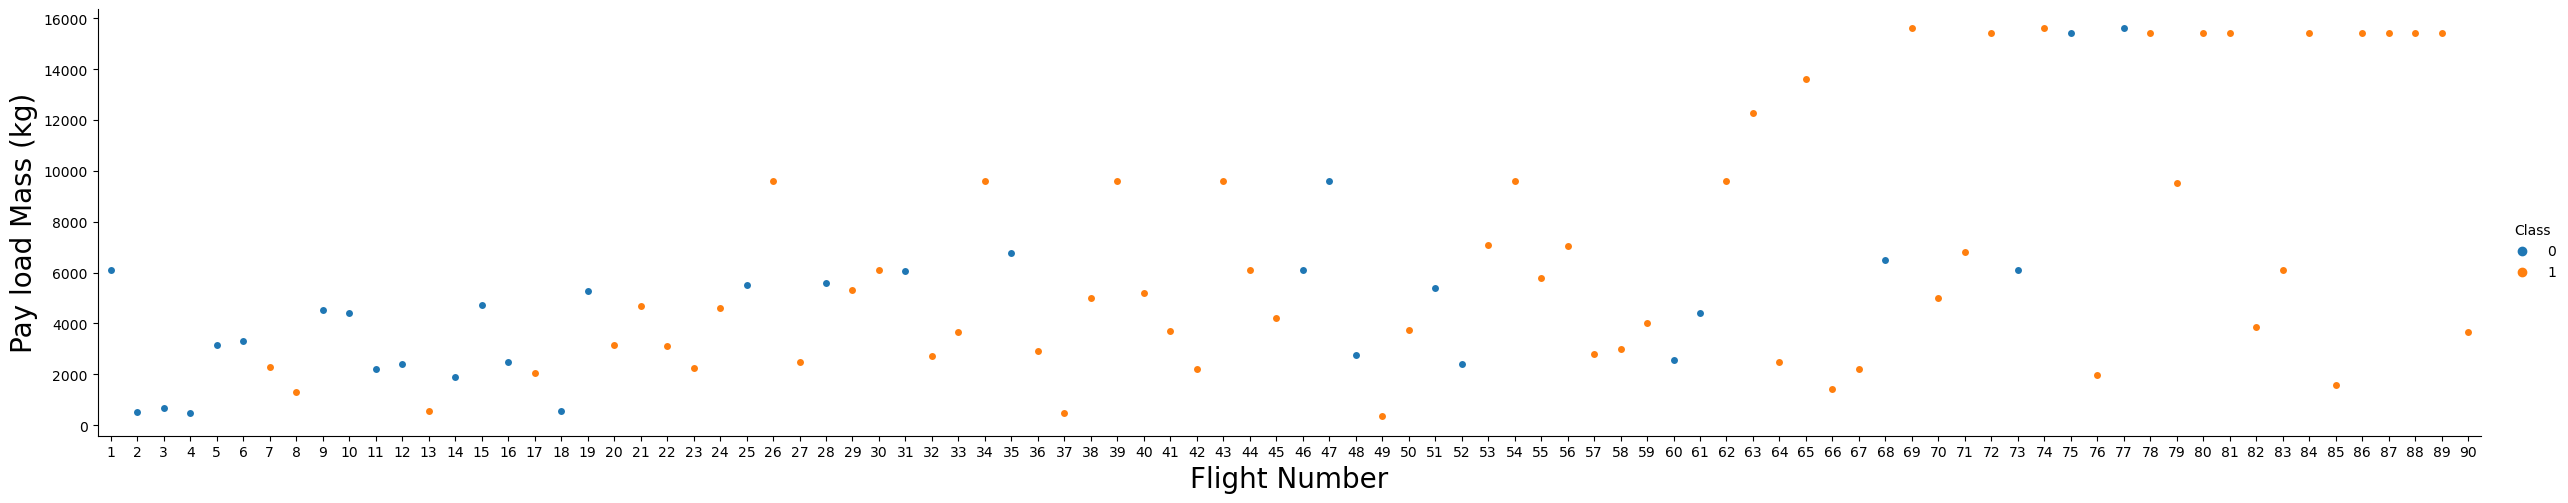

In [15]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


In [ ]:
# Display all column names
print("Column names:", df.columns.tolist())

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


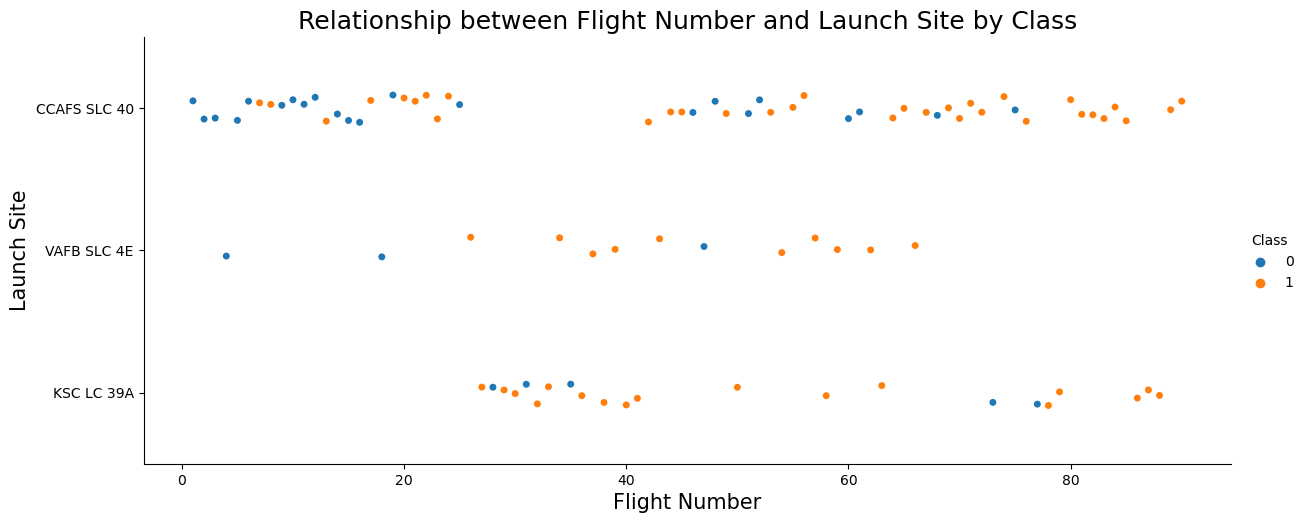

In [12]:
# Convert 'class' from integer to category
df['Class'] = df['Class'].astype('category')

# Plot a scatter point chart with x-axis to be Flight Number, y-axis to be the launch site, and hue to represent the class
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, kind="strip", aspect=2.5)

# Setting the axis labels and the title
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.title("Relationship between Flight Number and Launch Site by Class", fontsize=18)

# Display the plot
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.

Key patterms found in the scatter plot 
1. Launch Site Preference: There are three distinct launch sites being used: CCAFS SLC 40, VAFB SLC 4E, and KSC LC 39A. Each launch site appears to have launches spread across the range of flight numbers, suggesting continuous use over time.
2. 
Flight Number Distribution: The flight numbers are sequential on the x-axis and increase left to right, which could represent the chronological order of the launches. It looks like all three sites have been active throughout the range of flight numbers, though there seems to be a higher density of flights at CCAFS SLC 40.3. 

Class Distribution: The hue, representing the 'class', shows two categories - likely to represent two outcomes such as success or failure, with 0 and 1 as the possible values. At a glance, there seems to be a trend where the number of successful launches (represented by one of the colors) increases with higher flight numbers. This might suggest improvements in launch reliability or technology over tim4. e.

Site Specific Patterns: It's observable that the KSC LC 39A site has a consistent pattern of the two classes, while the other two sites, especially VAFB SLC 4E, show a more sporadic distribution between the classes across flight numbers. This could indicate differences in mission profiles, vehicle types, or operational practices at each site.


### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


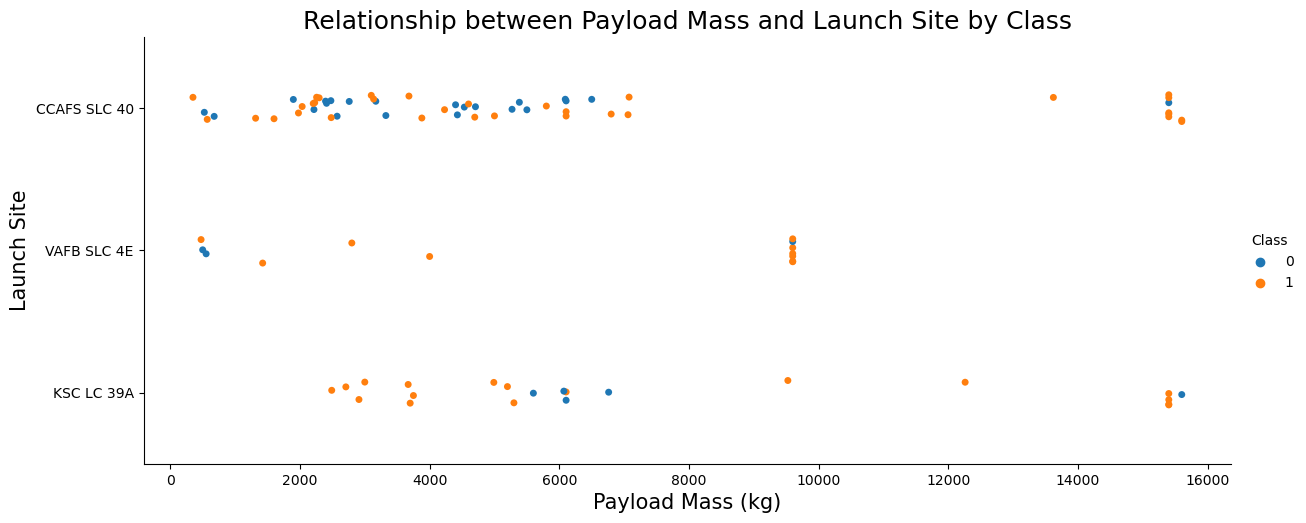

In [17]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is  DataFrame and has already been loaded

# Plot a scatter point chart with x-axis to be Payload Mass (kg), y-axis to be the launch site, and hue to be the class value
sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, kind="strip", aspect=2.5)

# Setting the axis labels and the title
plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.title("Relationship between Payload Mass and Launch Site by Class", fontsize=18)

# Display the plot
plt.show()


Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


In [ ]:
From the scatter plot illustrating the relationship between Payload Mass and Launch Site by Class, we can deduce the following patterns:

1. Payload Mass Distribution: Payload masses vary across different launch sites. The CCAFS SLC 40 site seems to handle a wide range of payload masses, from very light to the heaviest payloads depicted on the plot. This suggests a versatile launch capability at this site.

2. Launch Site Utilization: The VAFB SLC 4E site is used less frequently for the launches and seems to have a narrower range of payload masses when compared to CCAFS SLC 40. KSC LC 39A also supports a wide range of payload masses but with fewer flights than CCAFS SLC 40.

3. Outcome by Class: The class variable, likely representing success (1) or failure (0), shows that for the most part, there are successful launches across all ranges of payload masses at all sites. However, there are a few instances of class 0 at lower payload masses, particularly noticeable at the VAFB SLC 4E site.

4. Site Specific Payload Capacity: The CCAFS SLC 40 site has the most data points, indicating that it has been used for a wider variety of missions with different payload masses. Additionally, the highest payload masses are only launched from two sites, CCAFS SLC 40 and KSC LC 39A, suggesting these sites may be specialized or equipped to handle heavier payloads.

### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


C:\Users\dell\AppData\Local\Temp\ipykernel_4112\1050323680.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Class', y='Orbit', data=orbit_success_rate_sorted, ci=None)


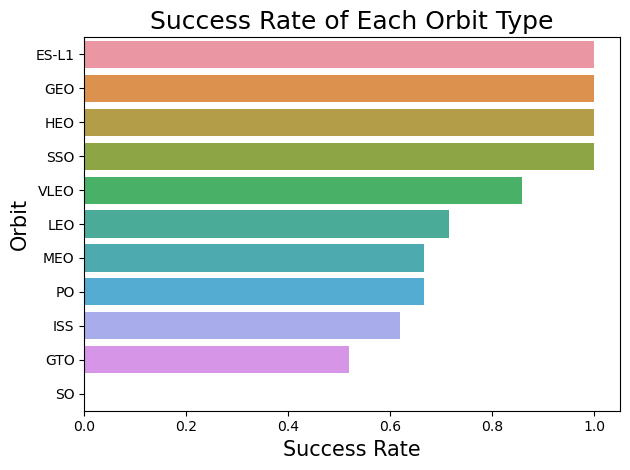

In [18]:
# HINT use groupby method on Orbit column and get the mean of Class column
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is  DataFrame and has already been loaded

# Group by the 'Orbit' column and calculate the mean of the 'Class' column
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

# Sort the orbits by success rate
orbit_success_rate_sorted = orbit_success_rate.sort_values('Class', ascending=False)

# Create a bar chart for the success rate of each orbit
sns.barplot(x='Class', y='Orbit', data=orbit_success_rate_sorted, ci=None)

# Setting the axis labels and the title
plt.xlabel("Success Rate", fontsize=15)
plt.ylabel("Orbit", fontsize=15)
plt.title("Success Rate of Each Orbit Type", fontsize=18)

# Display the plot
plt.tight_layout()
plt.show()


Analyze the ploted bar chart try to find which orbits have high sucess rate.

1. Bar chart representing the success rate of each orbit type, here are three key points:
2. 
High Success Orbits: The ES-L1, GEO, HEO, and SSO orbits have the highest success rates, all appearing very close to 1.0, which suggests that nearly all launches to these orbits have been successful.3. 

Moderate to High Success Orbits: Orbits like VLEO and LEO also show high success rates but are slightly less than the top performers. This could indicate that while these orbits are generally reliably reached, there may be a few more challenges or failures associated with them compared to the ES-L1, GEO, HEO, and SSO orbit4.s.

Lower Success Orbits: The GTO and SO orbits display lower success rates compared to the others. These orbits could inherently present more complex challenges or could be used for more experimental or high-risk missions, which would result in a lower success rate.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


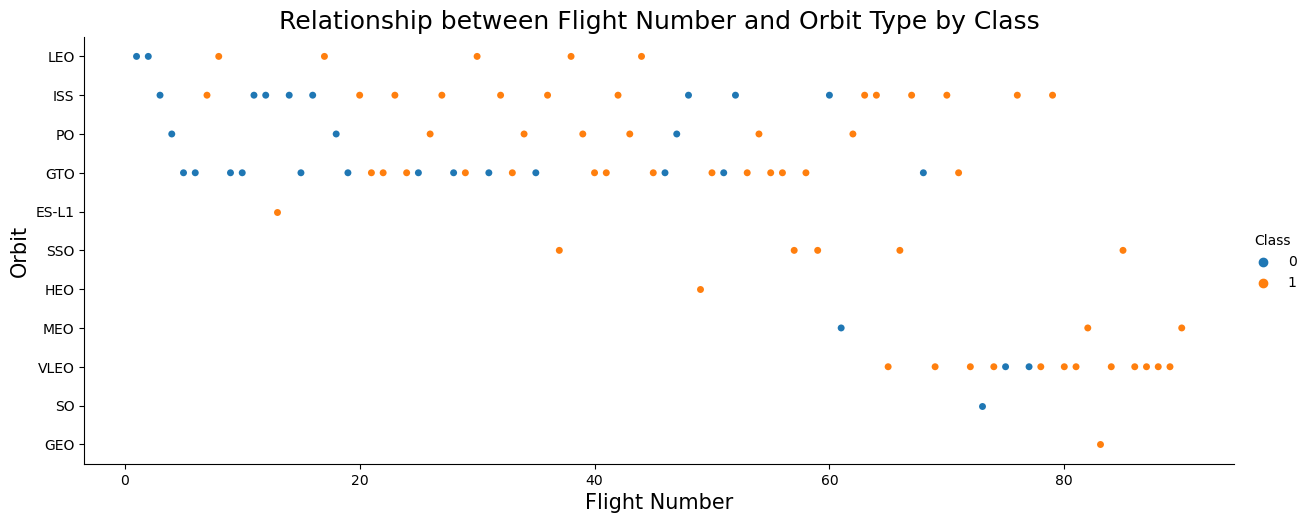

In [19]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df has been previously defined and loaded with the dataset

# Create a scatter plot with FlightNumber on the x-axis, Orbit on the y-axis, and hue representing the Class value
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df, kind="swarm", aspect=2.5)

# Set the axis labels and the title for the plot
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Orbit", fontsize=15)
plt.title("Relationship between Flight Number and Orbit Type by Class", fontsize=18)

# Display the plot
plt.show()


You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

Insights from the Scatter plot 
1. Orbit-Specific Flight Frequency: Certain orbits such as VLEO have a larger number of flights, indicated by the density of points, suggesting these orbits are frequently used compared to others like ES-L1, which have fewer flights.
2. 
Class Distribution Across Orbits: Most orbits have a mix of class 0 and class 1 outcomes, but the proportion varies. For instance, SSO shows a higher proportion of class 1 (success) outcomes, while SO has a more balanced distribution of success and non-success outcomes, hinting at different risk profiles for the missions to these orbits.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 35.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


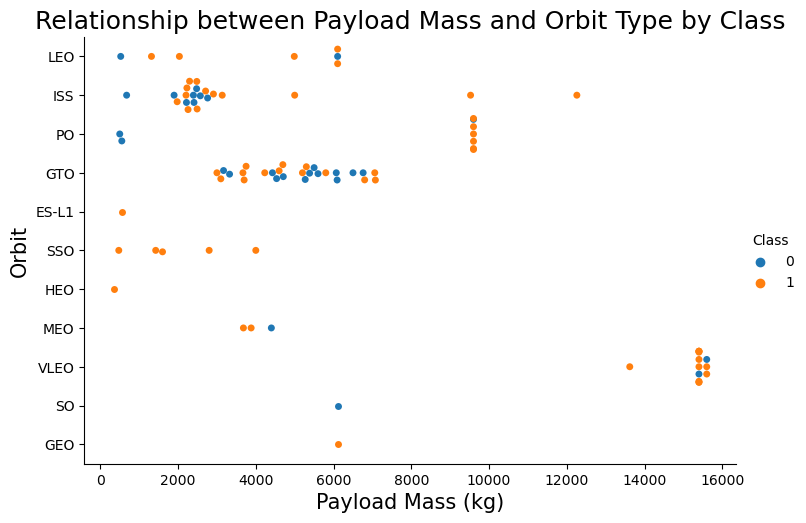

In [20]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame that has already been loaded with the dataset

# Plot a scatter point chart with x-axis to be Payload and y-axis to be Orbit, with the hue representing the Class value
sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=df, kind="swarm", aspect=1.5)

# Set the axis labels and the title for the plot
plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Orbit", fontsize=15)
plt.title("Relationship between Payload Mass and Orbit Type by Class", fontsize=18)

# Display the plot
plt.show()



With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


In [ ]:
Based on the provided scatter plot showing the relationship between Payload Mass and Orbit Type by Class, here are three key insights:

1. Variability in Payload Mass: There is a wide range of payload masses across different orbits, with GTO and LEO having the largest span, indicating these orbits are used for a variety of missions with varying payload requirements.

2. Success Across Payload Masses: Successful launches (Class 1) are spread across the entire range of payload masses, suggesting that success is not solely dependent on the mass of the payload for the orbits shown.

3. Orbit-Specific Payload Constraints: Certain orbits, such as SSO and ES-L1, tend to have payloads within a more constrained mass range, possibly indicating specific mission profiles or launch vehicle capabilities tailored to those orbits.

### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend. 


The function will help you get the year from the date:


In [21]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

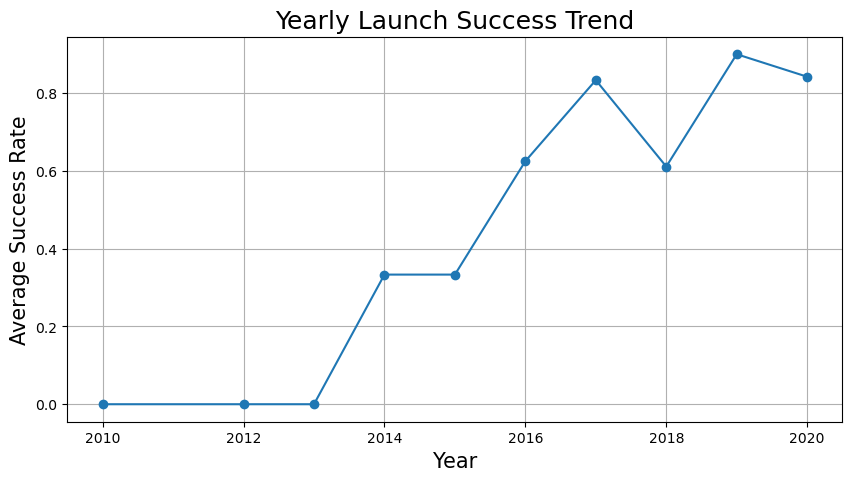

In [23]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame that has already been loaded with the dataset

# A function to Extract years from the date
def Extract_year(date):
    year = []
    for i in date:
        year.append(i.split("-")[0])
    return year

# Extract year from 'Date' and create a new column 'Year'
df['Year'] = Extract_year(df['Date'])

# Convert 'Year' to integer for proper plotting
df['Year'] = df['Year'].astype(int)

# Group by the 'Year' and calculate the mean of the 'Class' column for success rate
yearly_success_rate = df.groupby('Year')['Class'].mean().reset_index()

# Plot a line chart with x-axis to be the extracted year and y-axis to be the success rate
plt.figure(figsize=(10, 5))
plt.plot(yearly_success_rate['Year'], yearly_success_rate['Class'], marker='o')

# Set the axis labels and the title for the plot
plt.xlabel('Year', fontsize=15)
plt.ylabel('Average Success Rate', fontsize=15)
plt.title('Yearly Launch Success Trend', fontsize=18)

# Display the plot
plt.grid(True)
plt.show()


You can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.


In [ ]:
Key insights from the line chart
1. Success Rate Improvement: The success rate improves steadily from 2010 to 2016.

2. 2018 Decline: There's a notable decrease in success rate in 2018.

3. Post-2018 Recovery: Success rate recovers after 2018, maintaining a high level.

## Features Engineering 


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [24]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


 ### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [25]:
# HINT: Use get_dummies() function on the categorical columns
import pandas as pd

# Assuming 'features' is the DataFrame that has already been loaded with the dataset

# Select categorical columns to be one-hot encoded
categorical_columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# Create dummy variables for the categorical columns and concatenate with the original DataFrame
features_one_hot = pd.get_dummies(features, columns=categorical_columns)

# Display the first few rows of the dataframe with the new one-hot encoded columns
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [26]:
# HINT: use astype function
# Cast all numeric columns to float64
features_one_hot = features_one_hot.astype(float)

# Display the first few rows of the DataFrame
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range. 


<code>features_one_hot.to_csv('dataset_part_3.csv', index=False)</code>


In [ ]:
# Save the DataFrame to a CSV file
features_one_hot.to_csv('dataset_part_3.csv', index=False)


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla     | Modified markdown |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |
| 2020-11-10       | 1.1    | Nayef      | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
